In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [27]:
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}

In [76]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b' }
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
        
    def fit(self, data):
        self.data = data
        opt_dict={}
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        step_sizes=[self.max_feature_value*0.1,
                   self.max_feature_value*0.01,
                   self.max_feature_value*0.001]
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not (yi*(np.dot(w_t,xi)+b)>=1):
                                    found_option = False

                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0]<0:
                    optimized = True
                    print('op 1 step')
                else:
                    w = w-step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b-v)/w[1]
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (wx+b)=1
        # positive support vector machine hyperplane
        psv1 =hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 =hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max],[psv1,psv2],'k')
        
        # (wx+b)=1
        # negative support vector machine hyperplane
        nsv1 =hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 =hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max],[nsv1,nsv2],'k')
        
        # (wx+b)=0
        # positive support vector machine hyperplane
        db1 =hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 =hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max],[db1,db2],'y--')
        
        plt.show()

<IPython.core.display.Javascript object>


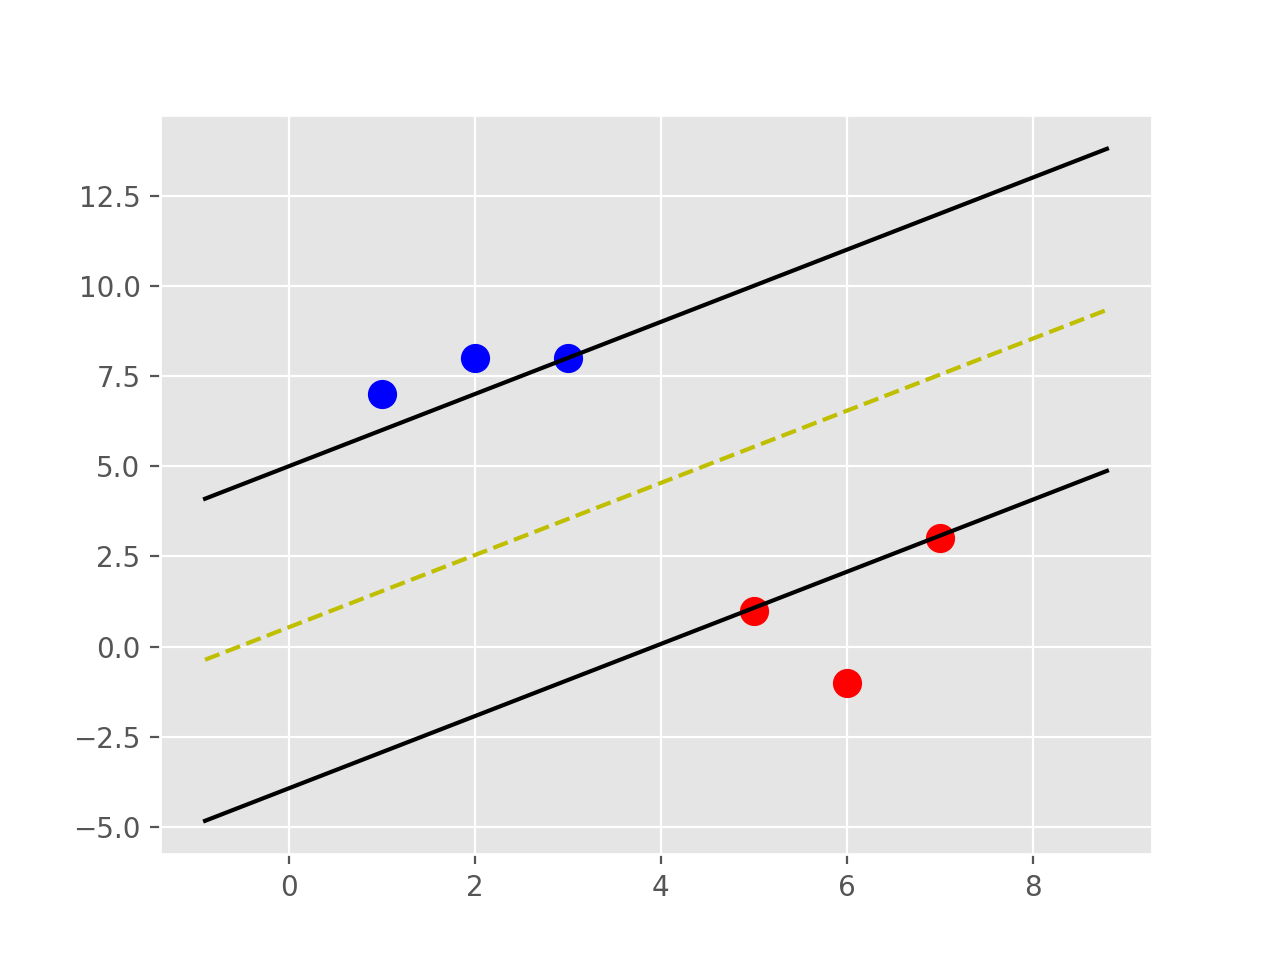

op 1 step
op 1 step
op 1 step


In [78]:
%matplotlib notebook
svm = Support_Vector_Machine()
svm.fit(data_dict)
svm.visualize()

In [79]:
from sklearn import svm
help(svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly